In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('Bank.xlsx')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
data.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.shape

(5000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
data=data.drop(['ID','Experience','ZIP Code'],axis=1)
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [8]:
columns=list(data.columns)
columns

['Age',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [9]:
data_x=data.drop('Personal Loan',axis=1)
data_y=data["Personal Loan"]


In [10]:
type(data_x)

pandas.core.frame.DataFrame

In [11]:
data_x['Income']

0        49
1        34
2        11
3       100
4        45
       ... 
4995     40
4996     15
4997     24
4998     49
4999     83
Name: Income, Length: 5000, dtype: int64

<AxesSubplot:ylabel='Density'>

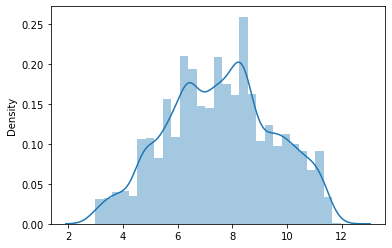

In [12]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data_x['Income'].values.reshape(-1,1))
temp=pt.transform(data_x['Income'].values.reshape(-1,1))
data_x['Income']=temp
sns.distplot(temp)

<AxesSubplot:ylabel='Density'>

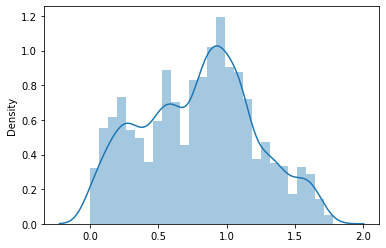

In [13]:
pt=PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data_x['CCAvg'].values.reshape(-1,1))
temp=pt.transform(data_x['CCAvg'].values.reshape(-1,1))
data_x['CCAvg']=temp
sns.distplot(temp)


In [14]:
data_x['Mortgage_Int']=pd.cut(data_x['Mortgage'],
                              bins=[0,100,200,300,400,500,600,700],
                              labels=[0,1,2,3,4,5,6],
                              include_lowest=True)
data_x.drop('Mortgage',axis=1,inplace=True)
data_x.head()


,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,6.827583,4,0.845150,1,1,0,0,0,0
1,45,5.876952,3,0.814468,1,1,0,0,0,0
2,39,3.504287,1,0.633771,1,0,0,0,0,0
3,35,8.983393,1,1.107409,2,0,0,0,0,0
4,35,6.597314,4,0.633771,2,0,0,0,1,0


In [15]:
data_x['Mortgage_Int'].unique()

[0, 1, 2, 4, 3, 6, 5]
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [16]:
x=data_x.values
x

array([[25.        ,  6.82758253,  4.        , ...,  0.        ,
         0.        ,  0.        ],
       [45.        ,  5.87695225,  3.        , ...,  0.        ,
         0.        ,  0.        ],
       [39.        ,  3.50428679,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [63.        ,  5.05817273,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       [65.        ,  6.82758253,  3.        , ...,  1.        ,
         0.        ,  0.        ],
       [28.        ,  8.37927414,  3.        , ...,  1.        ,
         1.        ,  0.        ]])

In [17]:
y=data_y.values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()

x=sc_x.fit_transform(x)

x

array([[-1.77441684, -0.37393933,  1.39741398, ..., -1.21661774,
        -0.64531434, -0.47897149],
       [-0.02952359, -0.85862431,  0.52599094, ..., -1.21661774,
        -0.64531434, -0.47897149],
       [-0.55299157, -2.0683431 , -1.21685513, ..., -1.21661774,
        -0.64531434, -0.47897149],
       ...,
       [ 1.54088033, -1.27608433, -0.34543209, ..., -1.21661774,
        -0.64531434, -0.47897149],
       [ 1.71536965, -0.37393933,  0.52599094, ...,  0.82195086,
        -0.64531434, -0.47897149],
       [-1.51268285,  0.41720064,  0.52599094, ...,  0.82195086,
         1.54963239, -0.47897149]])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=50)
x_train,x_test,y_train,y_test

(array([[-0.29125758, -0.82197147,  0.52599094, ..., -1.21661774,
         -0.64531434, -0.47897149],
        [ 1.366391  ,  0.10448139,  1.39741398, ..., -1.21661774,
         -0.64531434, -0.47897149],
        [ 1.01741235,  0.10448139, -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149],
        ...,
        [-0.90197022, -1.27608433,  1.39741398, ..., -1.21661774,
         -0.64531434, -0.47897149],
        [-0.02952359, -0.58444119, -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149],
        [ 0.93016769, -1.0964758 , -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149]]),
 array([[ 1.62812499, -1.05445939,  0.52599094, ...,  0.82195086,
         -0.64531434, -0.47897149],
        [-0.72748089, -0.71633756, -1.21685513, ..., -1.21661774,
          1.54963239,  0.68527618],
        [ 1.27914634, -0.64920253, -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149],
        ...,
        [ 0.58118904, -0.61653752,  0.52599094, ..., -

In [20]:
pt

PowerTransformer(standardize=False)

<AxesSubplot:ylabel='Density'>

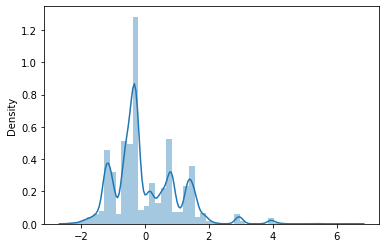

In [21]:
sns.distplot(x)


In [22]:
pt.transform([[145]])

array([[2.78047472]])

In [25]:
import pickle as pkl

In [26]:
with open('powertransformer.pkl', 'wb') as f:
    pkl.dump(pt, f, protocol=pkl.HIGHEST_PROTOCOL)

In [27]:
f=pkl.load(open('powertransformer.pkl','rb'))

In [28]:
f.transform([[123]])

array([[2.73533872]])

In [29]:
pkl.dump(sc_x,open('standardscaler.pkl','wb'))

In [30]:
sc=pkl.load(open('standardscaler.pkl','rb'))

In [31]:
sc

StandardScaler()

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=50)
x_train,x_test,y_train,y_test

(array([[-0.29125758, -0.82197147,  0.52599094, ..., -1.21661774,
         -0.64531434, -0.47897149],
        [ 1.366391  ,  0.10448139,  1.39741398, ..., -1.21661774,
         -0.64531434, -0.47897149],
        [ 1.01741235,  0.10448139, -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149],
        ...,
        [-0.90197022, -1.27608433,  1.39741398, ..., -1.21661774,
         -0.64531434, -0.47897149],
        [-0.02952359, -0.58444119, -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149],
        [ 0.93016769, -1.0964758 , -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149]]),
 array([[ 1.62812499, -1.05445939,  0.52599094, ...,  0.82195086,
         -0.64531434, -0.47897149],
        [-0.72748089, -0.71633756, -1.21685513, ..., -1.21661774,
          1.54963239,  0.68527618],
        [ 1.27914634, -0.64920253, -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149],
        ...,
        [ 0.58118904, -0.61653752,  0.52599094, ..., -

In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()

num_trees = 5

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees,random_state=2)
model.fit(x_train,y_train)


# results = model_selection.cross_val_score(model, x, y, cv=kfold)

# print(results) #nothing but accuracy of each decision tree

# y_predict=model.predict(x_test)
# y_predict
pkl.dump(model,open('bagging_model.pkl', 'wb'))
model=pkl.load(open('bagging_model.pkl','rb'))
y_predict=model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
# acs5=model.score(x_test,y_test)
# acs5 #test accuracy
from sklearn.metrics import accuracy_score
tac7=accuracy_score(y_train, model.predict(x_train))#train accuracy
acs5=accuracy_score(y_test,y_predict) #test accuracy
tac7,acs5


(0.998, 0.982)

In [35]:
x_test

array([[ 1.62812499, -1.05445939,  0.52599094, ...,  0.82195086,
        -0.64531434, -0.47897149],
       [-0.72748089, -0.71633756, -1.21685513, ..., -1.21661774,
         1.54963239,  0.68527618],
       [ 1.27914634, -0.64920253, -1.21685513, ...,  0.82195086,
        -0.64531434, -0.47897149],
       ...,
       [ 0.58118904, -0.61653752,  0.52599094, ..., -1.21661774,
         1.54963239, -0.47897149],
       [-1.25094887, -1.0134636 ,  1.39741398, ...,  0.82195086,
        -0.64531434, -0.47897149],
       [-0.11676826,  1.29550652, -0.34543209, ..., -1.21661774,
         1.54963239, -0.47897149]])

In [85]:
data.iloc[14,:]

Age                    67.0
Income                112.0
Family                  1.0
CCAvg                   2.0
Education               1.0
Mortgage                0.0
Personal Loan           0.0
Securities Account      1.0
CD Account              0.0
Online                  0.0
CreditCard              0.0
Name: 14, dtype: float64

In [76]:
a=list(data.iloc[18,:].values)
del a[6]
a

[46.0, 193.0, 2.0, 8.1, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [77]:
columns

['Age',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [78]:
import pickle as pkl

In [79]:
with open('bagging_model.pkl', 'rb') as f:
    model=pkl.load(f)
    k=model.predict([a])
    print(k)

[1]


0.77